# Multiple comparisons

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm
from scipy import stats

sns.set_style("whitegrid", {'grid.linestyle':'--'})

In [2]:
n_samples = 10000
n_trials = 500
Y = np.random.random(n_samples)
X = []
for _ in range(n_trials):
    X.append(np.random.randint(2, size=n_samples))

In [3]:
data = pd.DataFrame(np.array(X).T)
data.rename(columns={c: f'x_{c}' for c in data.columns}, inplace=True)
data['y'] = Y
data.head()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_491,x_492,x_493,x_494,x_495,x_496,x_497,x_498,x_499,y
0,0,1,0,0,0,0,1,0,0,0,...,1,1,0,0,1,0,0,0,1,0.650383
1,1,0,0,0,0,0,0,0,0,1,...,1,1,1,1,0,1,1,0,0,0.245465
2,0,1,0,0,1,0,0,0,1,0,...,0,0,1,0,0,1,1,0,0,0.350984
3,1,0,0,0,1,0,1,1,0,1,...,1,0,1,1,1,0,0,0,0,0.500212
4,1,1,1,0,1,0,1,1,0,0,...,0,1,0,1,1,0,0,1,1,0.623588


In [4]:
# conduct multiple comparisons
p_values = []
for c in tqdm(data.columns):
    if c.startswith('y'): 
        continue
    y0 = data[data[c] == 0]['y']
    y1 = data[data[c] == 1]['y']
    
    _, p = stats.ttest_ind(y0, y1, equal_var=False)
    p_values.append(p)

100%|██████████| 501/501 [00:12<00:00, 39.12it/s]


In [5]:
# summary
threshold = 0.05
print('Percentage of significant results: {:5.2%}'
      .format(sum([x < threshold for x in p_values]) / n_trials))

Percentage of significant results: 4.20%


<IPython.core.display.Javascript object>


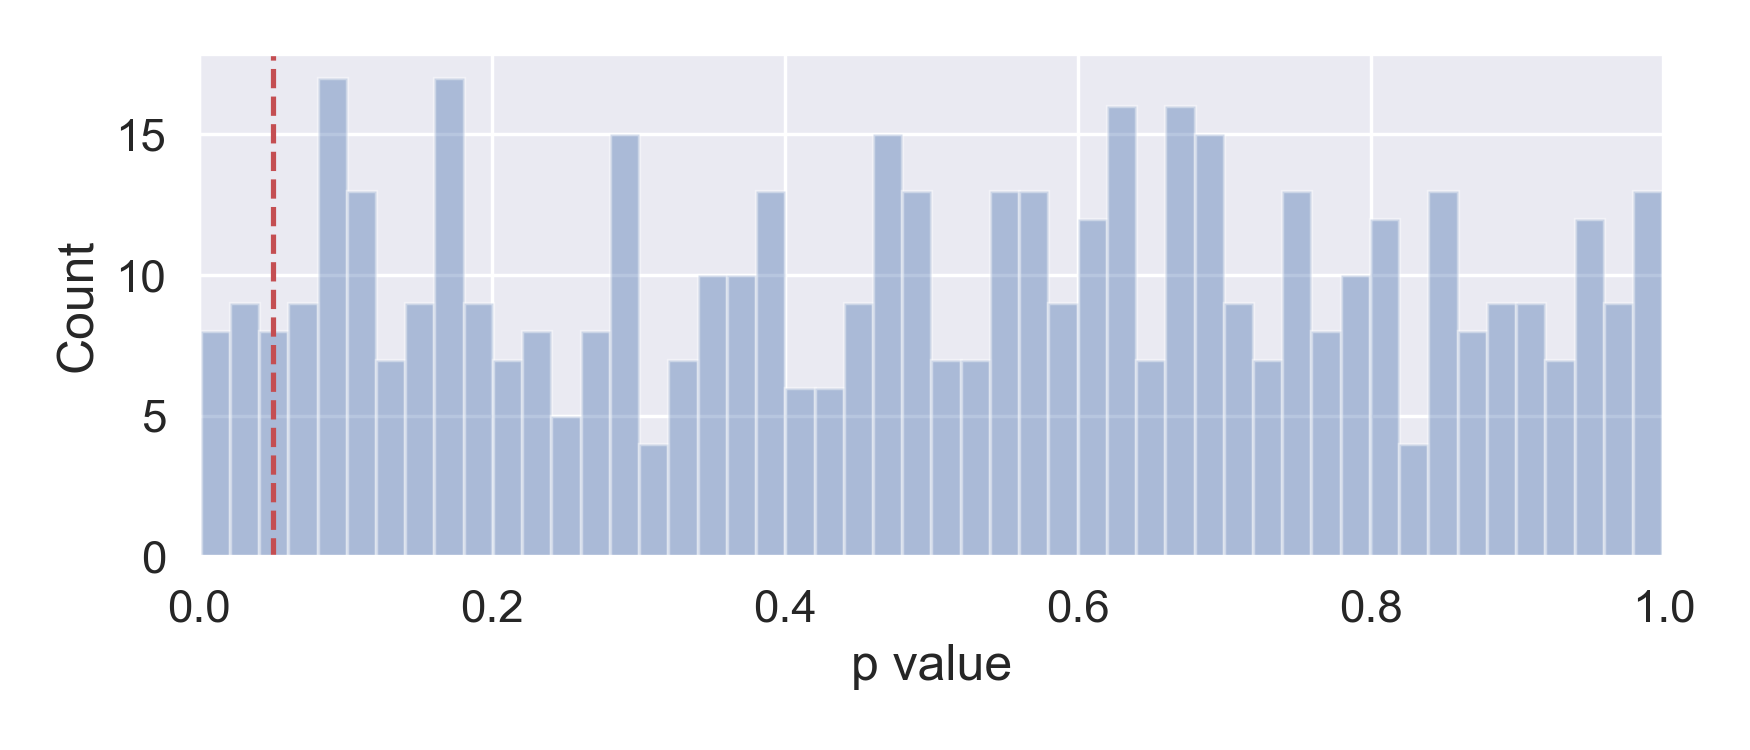

In [6]:
def plot_p_values(p_values, threshold=0.05):
    """Plot the histogram of p values."""
    sns.set(font_scale=1.2)
    plt.figure(figsize=(7, 3))
    sns.distplot(p_values, kde=False, bins=50)
    plt.axvline(x=threshold, color='r', linestyle='--')
    
    plt.xlim([0, 1])
    plt.xlabel('p value')
    plt.ylabel('Count')
    plt.tight_layout()
    
plot_p_values(p_values, threshold=threshold)

## With true signals

In [45]:
# add true signals
n_true_features = n_trials // 2
offset = np.random.normal(
    loc=5, scale=1, 
    size=(n_samples, n_true_features))        

offset_sum = np.multiply(
    offset, 
    data[data.columns[:n_true_features]].values).sum(axis=1)
Y2 = Y + offset_sum
data['y2'] = Y2

In [58]:
np.sqrt(np.std(offset_sum)**2 / 250)

2.568149796779838

In [53]:
np.std(np.multiply(offset, data[data.columns[:n_true_features]].values), axis=1)

array([2.60423844, 2.6847961 , 2.58923625, ..., 2.57910286, 2.56006365,
       2.6042995 ])

In [54]:
np.sqrt(13 - 2.5**2)

2.598076211353316

In [22]:
# conduct multiple comparisons
p_values = []
for c in tqdm(data.columns):
    if c.startswith('y'): 
        continue
    group_a = data[data[c] == 0]['y2']
    group_b = data[data[c] == 1]['y2']
    
    _, p = stats.ttest_ind(group_a, group_b, equal_var=False)
    p_values.append(p)

100%|██████████| 502/502 [00:11<00:00, 45.39it/s]


Percentage of significant results: 15.00%


<IPython.core.display.Javascript object>


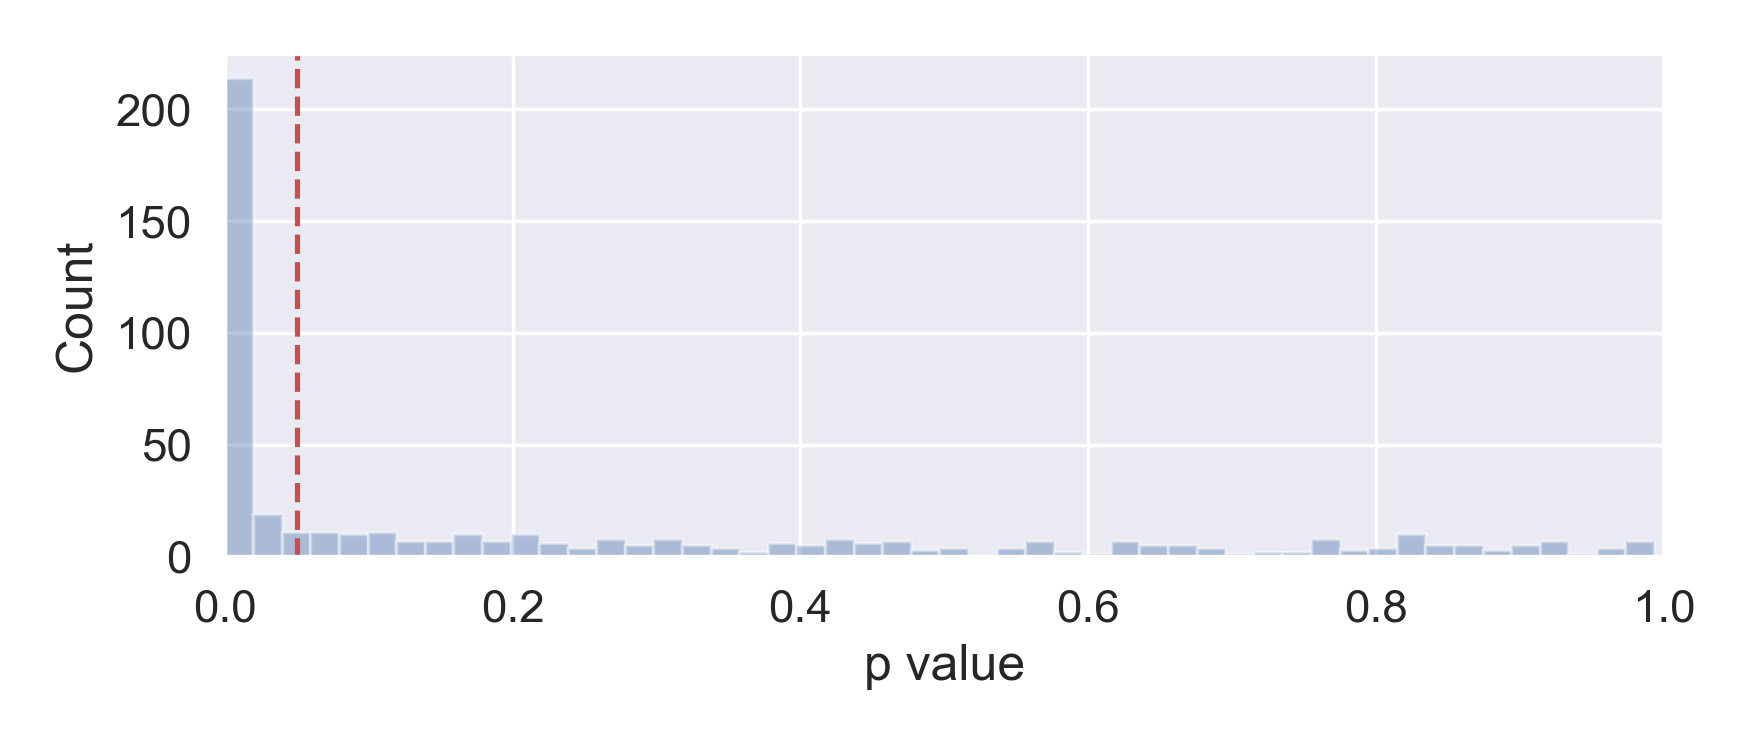

In [24]:
# summary
threshold = 0.05
print('Percentage of significant results: {:5.2%}'
      .format(sum([x < threshold / n_trials for x in p_values]) / n_trials))
plot_p_values(p_values, threshold=threshold)

In [32]:
data['y2'].std()

148.34539116530036

In [28]:
np.sqrt(250)

15.811388300841896

In [34]:
tmp = np.multiply(
    np.tile(offset, (n_true_features, 1)).T, 
    data[data.columns[:n_true_features]].values)

In [43]:
np.std(tmp.sum(axis=1)) / np.sqrt(tmp.shape[1])

9.381964361153175

In [42]:
tmp.shape

(10000, 250)